In [30]:
# %% IMPORT LIBRARIES

import numpy as np

from tqdm import tqdm
from matplotlib import pyplot as plt
from scipy import sparse as spr

import cs_algos
import cs_operators
import cs_utils

In [14]:
plt.style.use(['science','ieee'])

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "font.size": 24})

os.makedirs('./figures/daubechies_2004/', exist_ok=True)
path = './figures/daubechies_2004/'

In [19]:
# %% DEFINE SPARSE VECTOR

m = 40
N = 100
sparse_vec = spr.random(N, 1, density=0.05, random_state=10).todense()

sampling_mtx = cs_operators.random_sampling(m, N)
samples = (sampling_mtx @ sparse_vec)[:None]
noisy_samples = cs_utils.add_noise(samples, snr=10)

In [20]:
# %% SPARSE RECOVERY

rec_vec, errors = cs_algos.l1_ista(noisy_samples, sampling_mtx, lambd=.01, max_iter=1000, tol=1e-32)

In [21]:
# %% ERROR METRICS

rsnr = cs_utils.rec_snr(sparse_vec, rec_vec)
print(r'Reconstruction SNR: {0:.2e}'.format(rsnr))

Reconstruction SNR: 1.08e+01


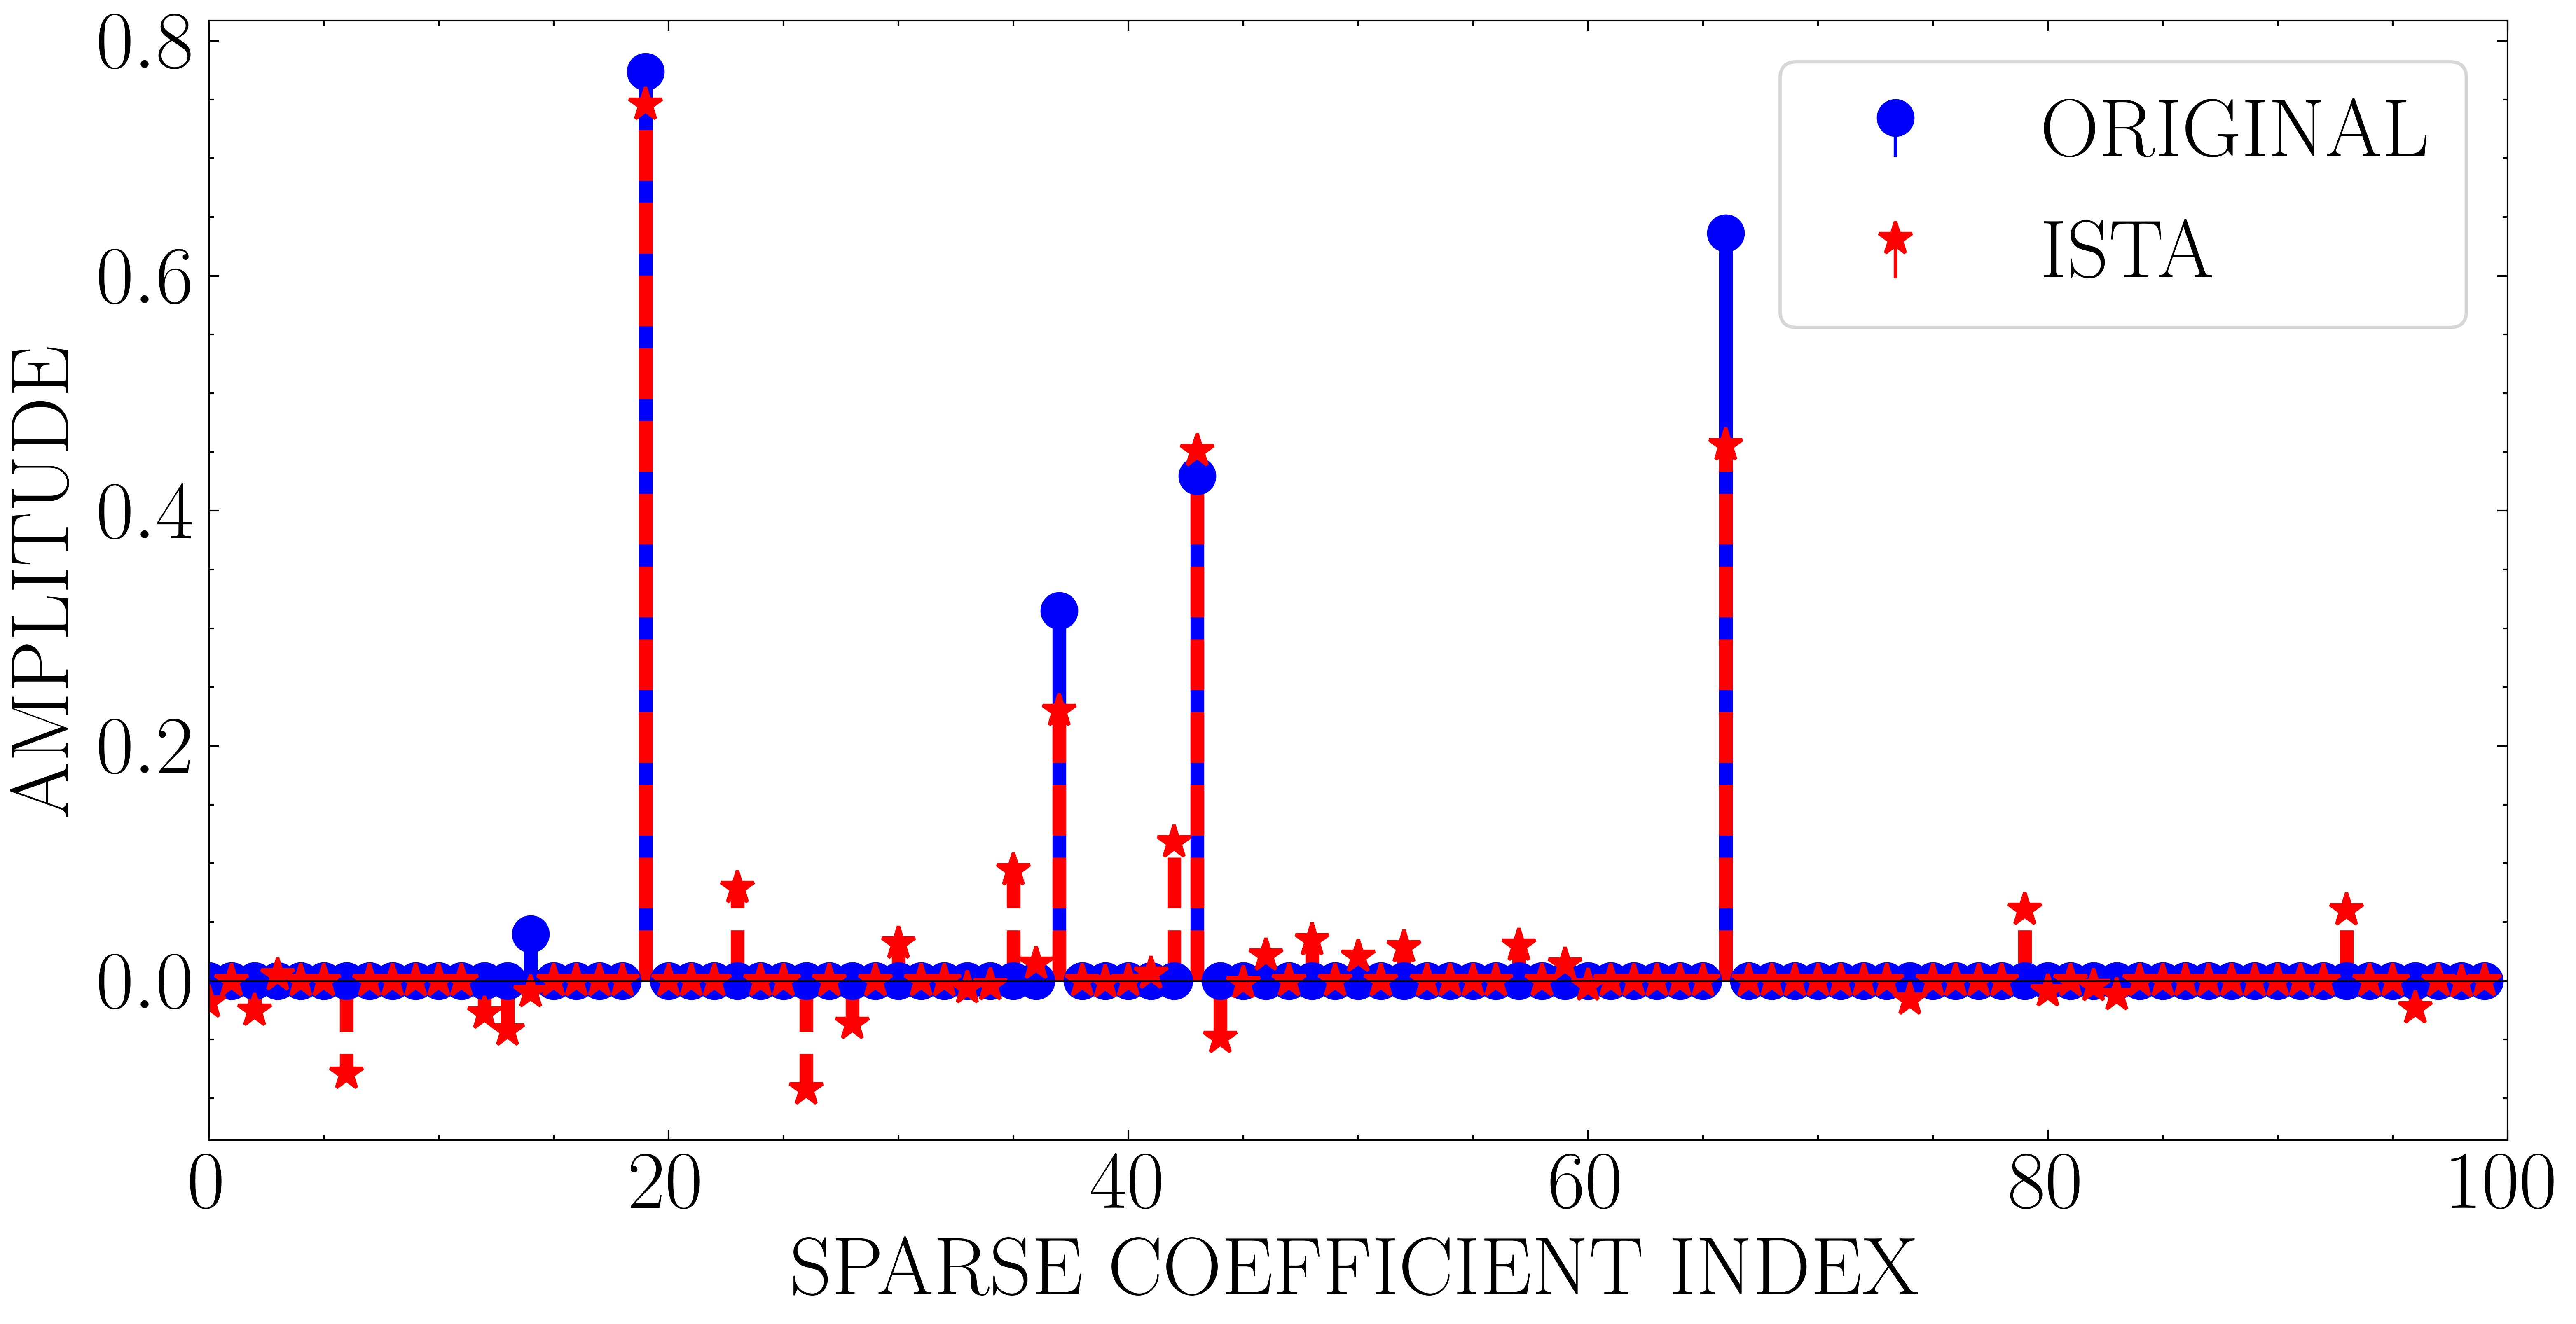

In [22]:
# %% RECONSTRUCTION PLOTS

plt.figure(figsize=(12,6))
ax = plt.gca()

cs_utils.plot_sparsevec(sparse_vec, ax=ax, marker_style='o', legend_label=r'ORIGINAL')
cs_utils.plot_sparsevec(rec_vec, ax=ax, plot_colour='red', line_style='--',
    legend_label=r'ISTA', xaxis_label=r'SPARSE COEFFICIENT INDEX', yaxis_label=r'AMPLITUDE',
    save=path+'ista_reconstruction')

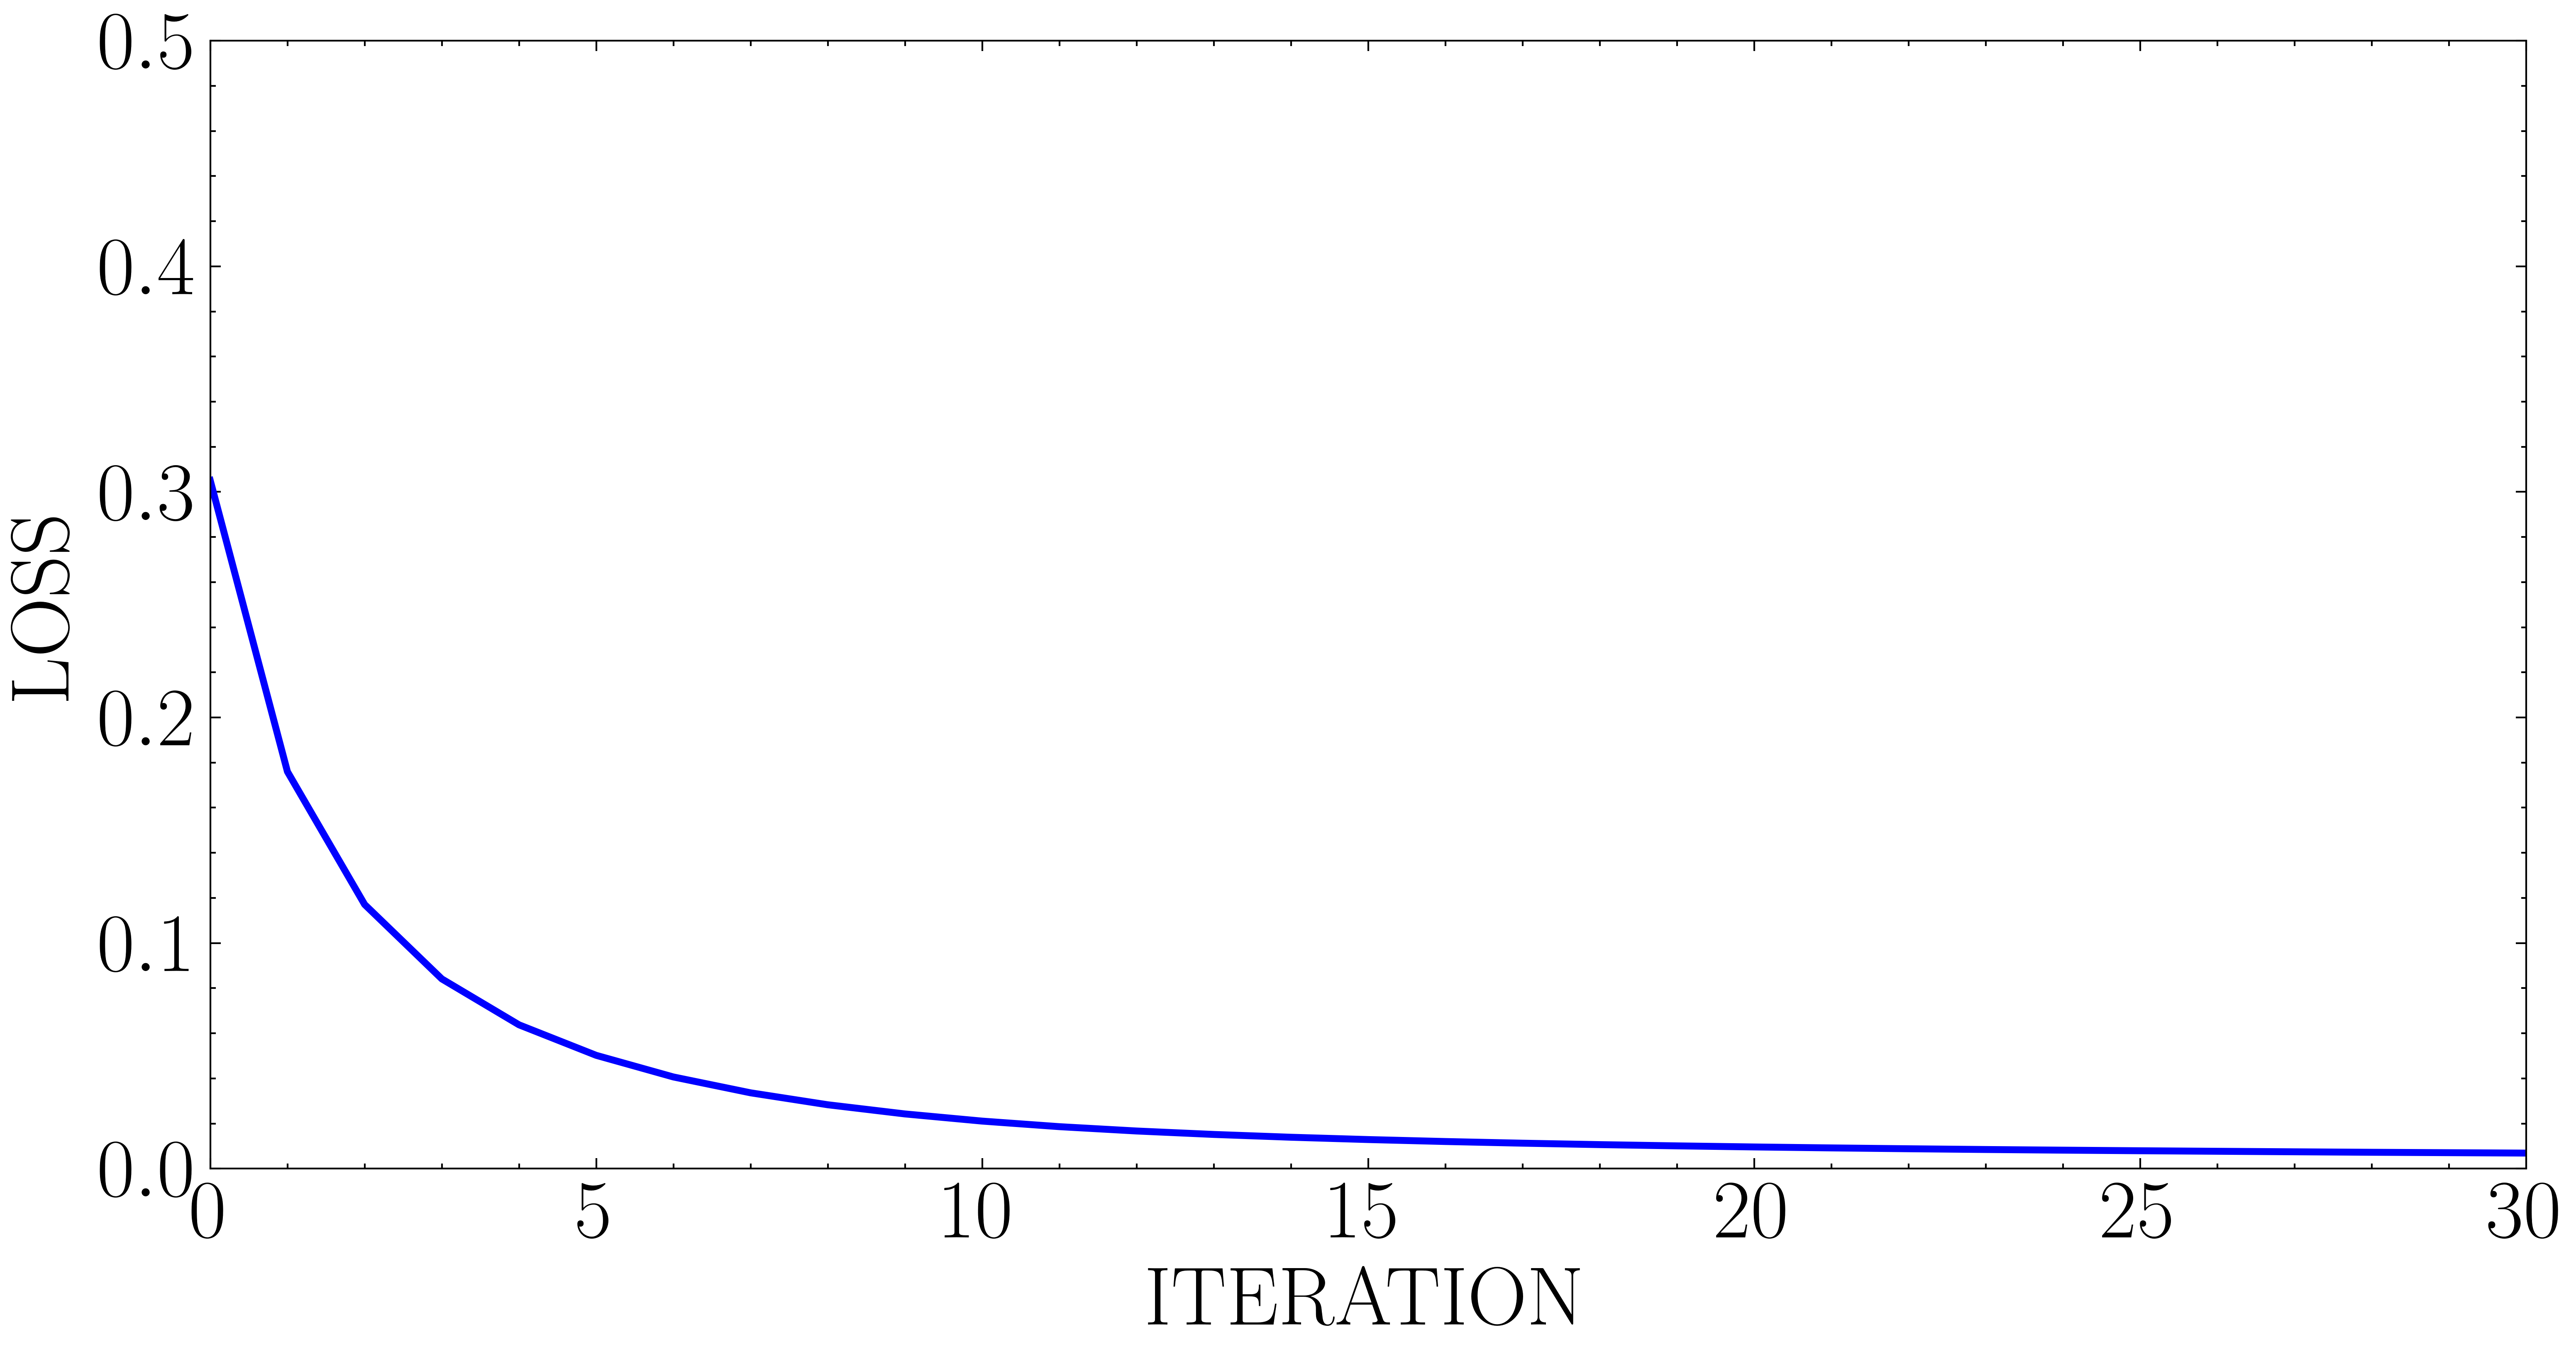

In [24]:
# %% LOSS

plt.figure(figsize=(12,6))
ax = plt.gca()

cs_utils.plot_signal(np.arange(len(errors)), errors, ax=ax, ylimits=[0,0.5],
    xaxis_label=r'ITERATION', yaxis_label=r'LOSS', xlimits=[0,30],
    save=path+'ista_loss')

In [34]:
# %% MONTE-CARLO ANALYSIS

densities = np.arange(0.05, 0.2, 0.05)
snrs = np.arange(10, 31, 5)
num_iter = 500

rsnr = np.zeros((len(snrs), len(densities), num_iter))

for den_itr, density in tqdm(enumerate(densities)):
    for snr_itr, snr in enumerate(snrs):
        for itr in range(num_iter):
            noisy_samples = cs_utils.add_noise(samples, snr=snr)
            rec_vec, _ = cs_algos.l1_ista(noisy_samples, sampling_mtx, lambd=.01, max_iter=1000)

            rsnr[snr_itr, den_itr, itr] = cs_utils.rec_snr(sparse_vec, rec_vec)

4it [33:25, 501.27s/it]
